# Titanic Disaster Analysis - Comprehensive EDA and Prediction

This notebook provides:
- Data download using kagglehub
- Detailed exploratory data analysis (EDA)
- Data cleaning and normalization
- Feature engineering
- Multiple ML models
- Hyperparameter optimization
- Model comparison and selection

## 1. Download Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 11.2MB/s]

Extracting files...
Path to dataset files: /Users/ismatsamadov/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


## 2. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Create charts directory
os.makedirs('charts', exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


## 3. Load Data

In [3]:
# Load the dataset
df = pd.read_csv(os.path.join(path, 'Titanic-Dataset.csv'))

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (891, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Initial Data Exploration

In [4]:
# Basic info
print("Dataset Info:")
print("="*50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Statistical summary
print("\nStatistical Summary:")
print("="*50)
df.describe()


Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values
print("\nMissing Values:")
print("="*50)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)


Missing Values:
          Missing Count  Percentage
Cabin               687   77.104377
Age                 177   19.865320
Embarked              2    0.224467


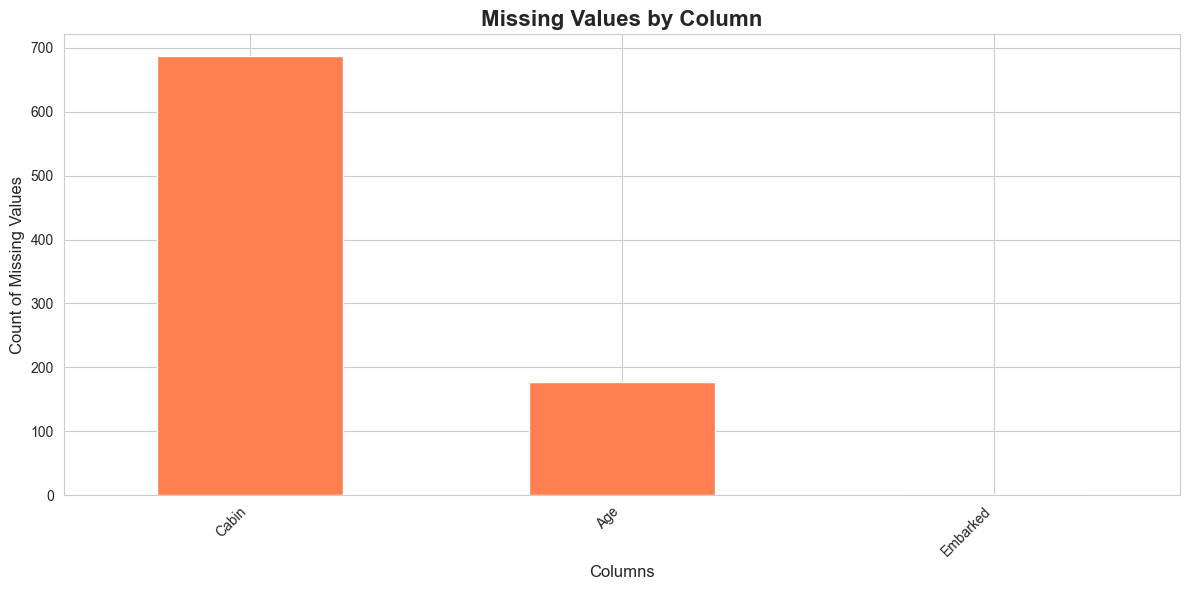

In [7]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    missing_data.plot(kind='bar', ax=ax, color='coral')
    ax.set_title('Missing Values by Column', fontsize=16, fontweight='bold')
    ax.set_xlabel('Columns', fontsize=12)
    ax.set_ylabel('Count of Missing Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('charts/01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values found!")

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## 5. Data Cleaning and Preprocessing

In [9]:
# Create a copy for cleaning
df_clean = df.copy()

print("Original shape:", df_clean.shape)

# Handle Age: Fill with median by Sex and Pclass
if 'Age' in df_clean.columns:
    df_clean['Age'] = df_clean.groupby(['Sex', 'Pclass'])['Age'].transform(
        lambda x: x.fillna(x.median())
    )
    print("Age missing values filled with median by Sex and Pclass")

# Handle Embarked: Fill with mode
if 'Embarked' in df_clean.columns:
    df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
    print("Embarked missing values filled with mode")

# Handle Fare: Fill with median
if 'Fare' in df_clean.columns:
    df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)
    print("Fare missing values filled with median")

# Handle Cabin: Create a binary feature for cabin availability
if 'Cabin' in df_clean.columns:
    df_clean['HasCabin'] = df_clean['Cabin'].notna().astype(int)
    print("Created HasCabin feature")

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Original shape: (891, 12)
Age missing values filled with median by Sex and Pclass
Embarked missing values filled with mode
Fare missing values filled with median
Created HasCabin feature

Missing values after cleaning:
Cabin    687
dtype: int64


## 6. Feature Engineering

In [10]:
# Extract title from Name
if 'Name' in df_clean.columns:
    df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    title_mapping = {
        'Mr': 'Mr',
        'Miss': 'Miss',
        'Mrs': 'Mrs',
        'Master': 'Master',
        'Dr': 'Rare',
        'Rev': 'Rare',
        'Col': 'Rare',
        'Major': 'Rare',
        'Mlle': 'Miss',
        'Countess': 'Rare',
        'Ms': 'Miss',
        'Lady': 'Rare',
        'Jonkheer': 'Rare',
        'Don': 'Rare',
        'Dona': 'Rare',
        'Mme': 'Mrs',
        'Capt': 'Rare',
        'Sir': 'Rare'
    }
    df_clean['Title'] = df_clean['Title'].map(title_mapping)
    print("Title extracted and mapped")

# Family size
if 'SibSp' in df_clean.columns and 'Parch' in df_clean.columns:
    df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
    df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)
    print("FamilySize and IsAlone features created")

# Age groups
if 'Age' in df_clean.columns:
    df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=[0, 12, 18, 35, 60, 100],
                                   labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
    print("AgeGroup feature created")

# Fare bins
if 'Fare' in df_clean.columns:
    df_clean['FareBin'] = pd.qcut(df_clean['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
    print("FareBin feature created")

print("\nNew features:")
print(df_clean.columns.tolist())

Title extracted and mapped
FamilySize and IsAlone features created
AgeGroup feature created
FareBin feature created

New features:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'HasCabin', 'Title', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareBin']


## 7. Exploratory Data Analysis (EDA)

### 7.1 Survival Analysis

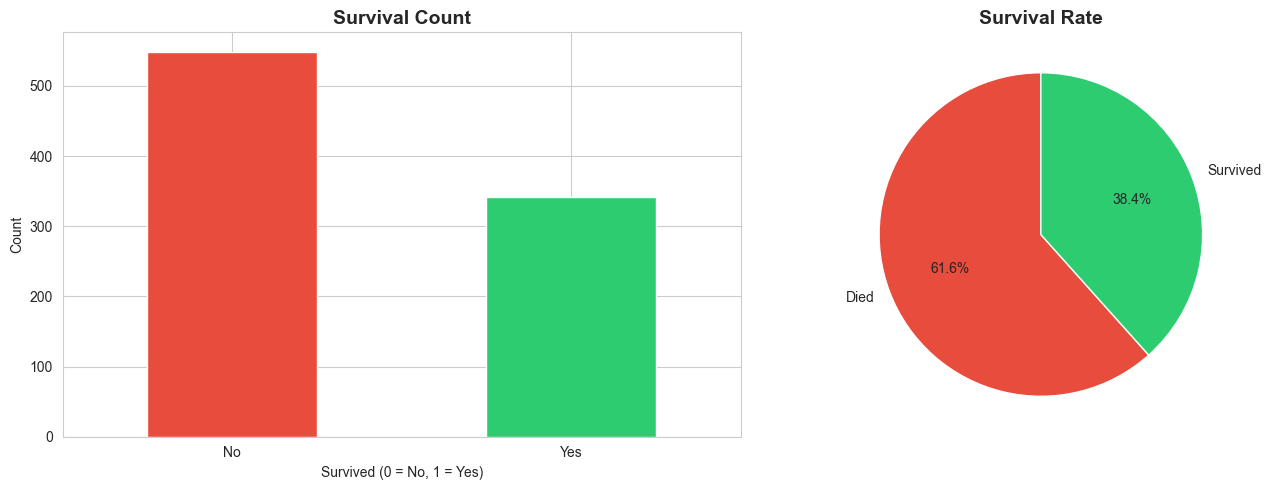


Survival Rate: 38.38%
Death Rate: 61.62%


In [11]:
# Overall survival rate
if 'Survived' in df_clean.columns:
    survival_rate = df_clean['Survived'].value_counts(normalize=True) * 100
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    df_clean['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival Count', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(['No', 'Yes'], rotation=0)
    
    # Pie chart
    axes[1].pie(df_clean['Survived'].value_counts(), labels=['Died', 'Survived'],
                autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'], startangle=90)
    axes[1].set_title('Survival Rate', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('charts/02_overall_survival.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nSurvival Rate: {survival_rate[1]:.2f}%")
    print(f"Death Rate: {survival_rate[0]:.2f}%")

### 7.2 Survival by Gender

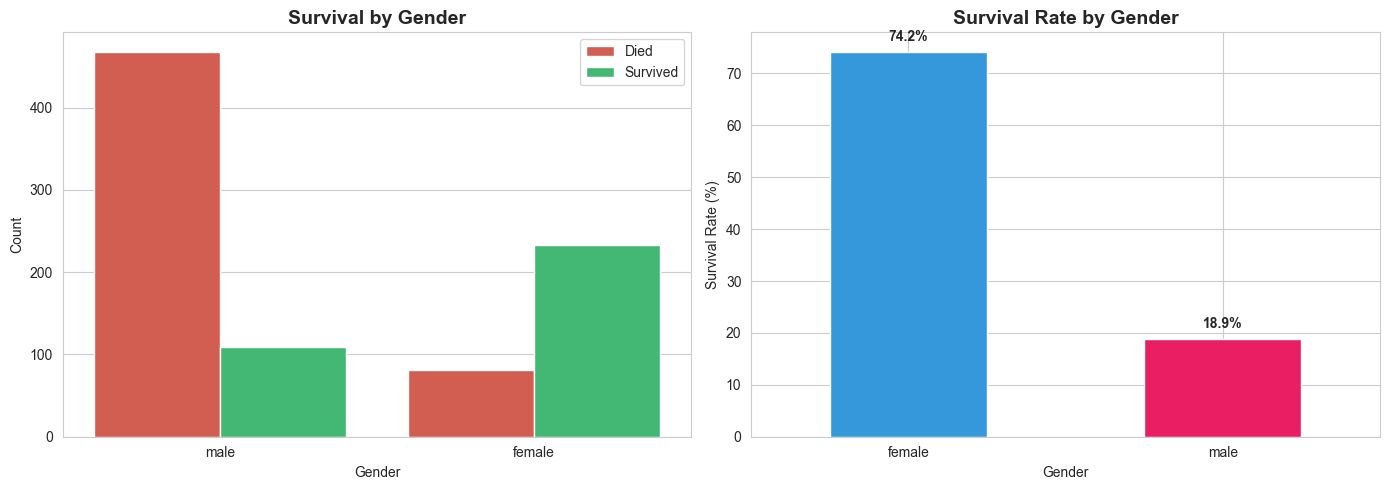


Survival rate by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [12]:
# Survival by Sex
if 'Sex' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df_clean, x='Sex', hue='Survived', ax=axes[0], palette=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival by Gender', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Count')
    axes[0].legend(['Died', 'Survived'])
    
    # Survival rate
    survival_by_sex = df_clean.groupby('Sex')['Survived'].mean() * 100
    survival_by_sex.plot(kind='bar', ax=axes[1], color=['#3498db', '#e91e63'])
    axes[1].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel('Survival Rate (%)')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    
    for i, v in enumerate(survival_by_sex):
        axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('charts/03_survival_by_gender.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nSurvival rate by gender:")
    print(survival_by_sex)

### 7.3 Survival by Passenger Class

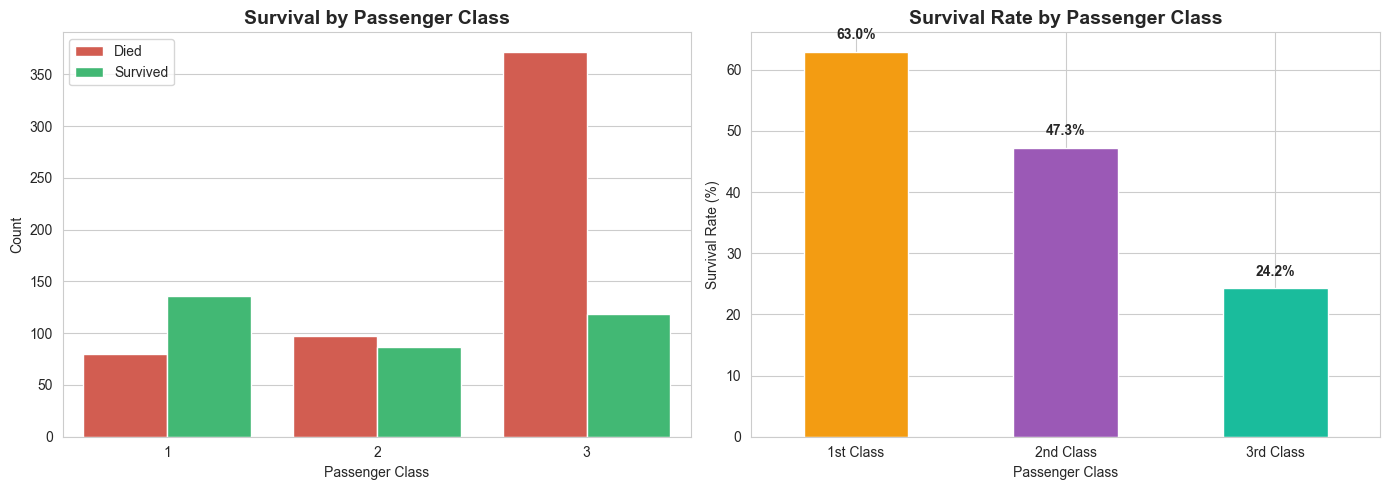


Survival rate by passenger class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [13]:
# Survival by Pclass
if 'Pclass' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df_clean, x='Pclass', hue='Survived', ax=axes[0], palette=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Passenger Class')
    axes[0].set_ylabel('Count')
    axes[0].legend(['Died', 'Survived'])
    
    # Survival rate
    survival_by_pclass = df_clean.groupby('Pclass')['Survived'].mean() * 100
    survival_by_pclass.plot(kind='bar', ax=axes[1], color=['#f39c12', '#9b59b6', '#1abc9c'])
    axes[1].set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Passenger Class')
    axes[1].set_ylabel('Survival Rate (%)')
    axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
    
    for i, v in enumerate(survival_by_pclass):
        axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('charts/04_survival_by_pclass.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nSurvival rate by passenger class:")
    print(survival_by_pclass)

### 7.4 Survival by Age

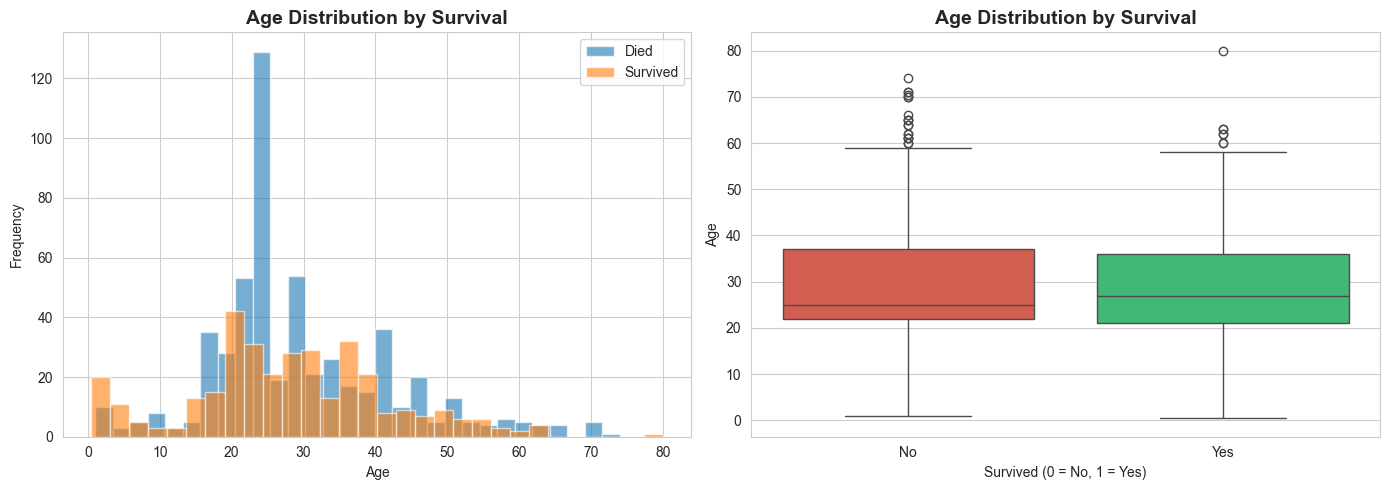


Age statistics by survival:
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  29.737705  12.818264  1.00  22.0  25.0  37.0  74.0
1         342.0  28.108684  14.010565  0.42  21.0  27.0  36.0  80.0


In [14]:
# Age distribution
if 'Age' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    for survived in [0, 1]:
        axes[0].hist(df_clean[df_clean['Survived'] == survived]['Age'].dropna(),
                    alpha=0.6, bins=30, label=['Died', 'Survived'][survived])
    axes[0].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Box plot
    sns.boxplot(data=df_clean, x='Survived', y='Age', ax=axes[1], palette=['#e74c3c', '#2ecc71'])
    axes[1].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Survived (0 = No, 1 = Yes)')
    axes[1].set_ylabel('Age')
    axes[1].set_xticklabels(['No', 'Yes'])
    
    plt.tight_layout()
    plt.savefig('charts/05_survival_by_age.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nAge statistics by survival:")
    print(df_clean.groupby('Survived')['Age'].describe())

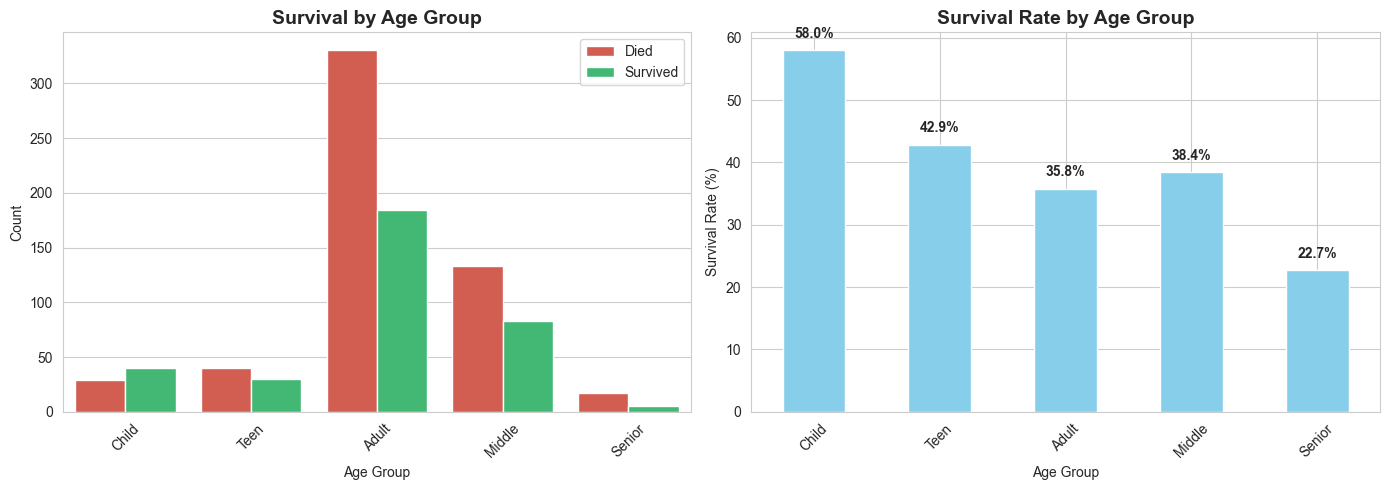

In [15]:
# Survival by Age Group
if 'AgeGroup' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df_clean, x='AgeGroup', hue='Survived', ax=axes[0], palette=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival by Age Group', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Age Group')
    axes[0].set_ylabel('Count')
    axes[0].legend(['Died', 'Survived'])
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
    
    # Survival rate
    survival_by_age_group = df_clean.groupby('AgeGroup')['Survived'].mean() * 100
    survival_by_age_group.plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Age Group')
    axes[1].set_ylabel('Survival Rate (%)')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    
    for i, v in enumerate(survival_by_age_group):
        axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('charts/06_survival_by_age_group.png', dpi=300, bbox_inches='tight')
    plt.show()

### 7.5 Survival by Family Size

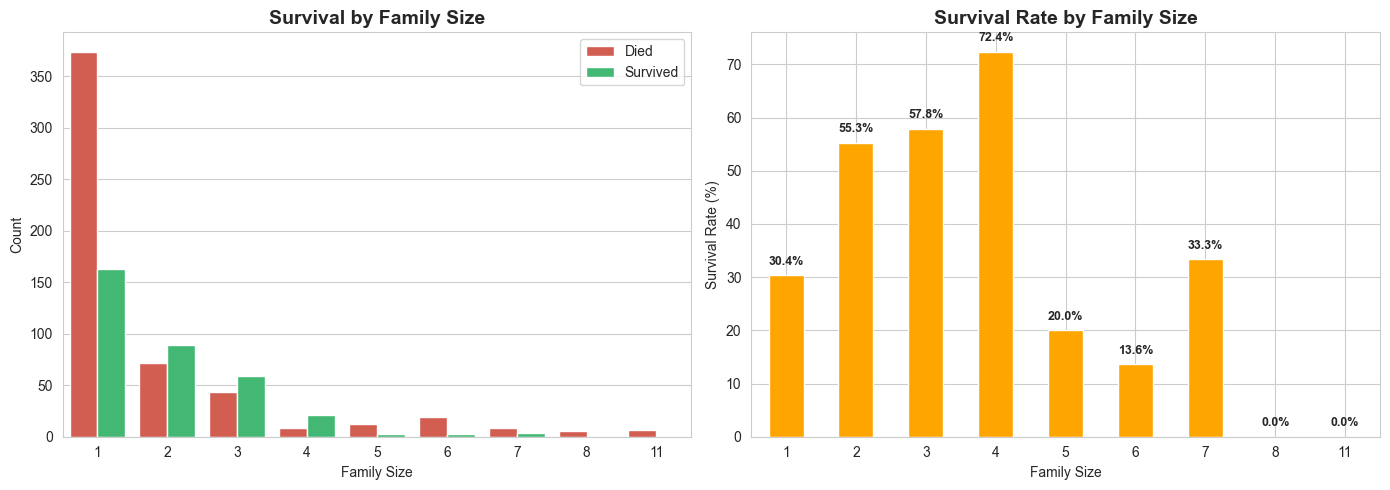

In [16]:
# Survival by Family Size
if 'FamilySize' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df_clean, x='FamilySize', hue='Survived', ax=axes[0], palette=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival by Family Size', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Family Size')
    axes[0].set_ylabel('Count')
    axes[0].legend(['Died', 'Survived'])
    
    # Survival rate
    survival_by_family = df_clean.groupby('FamilySize')['Survived'].mean() * 100
    survival_by_family.plot(kind='bar', ax=axes[1], color='orange')
    axes[1].set_title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Family Size')
    axes[1].set_ylabel('Survival Rate (%)')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    
    for i, v in enumerate(survival_by_family):
        axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('charts/07_survival_by_family_size.png', dpi=300, bbox_inches='tight')
    plt.show()

### 7.6 Survival by Embarked Port

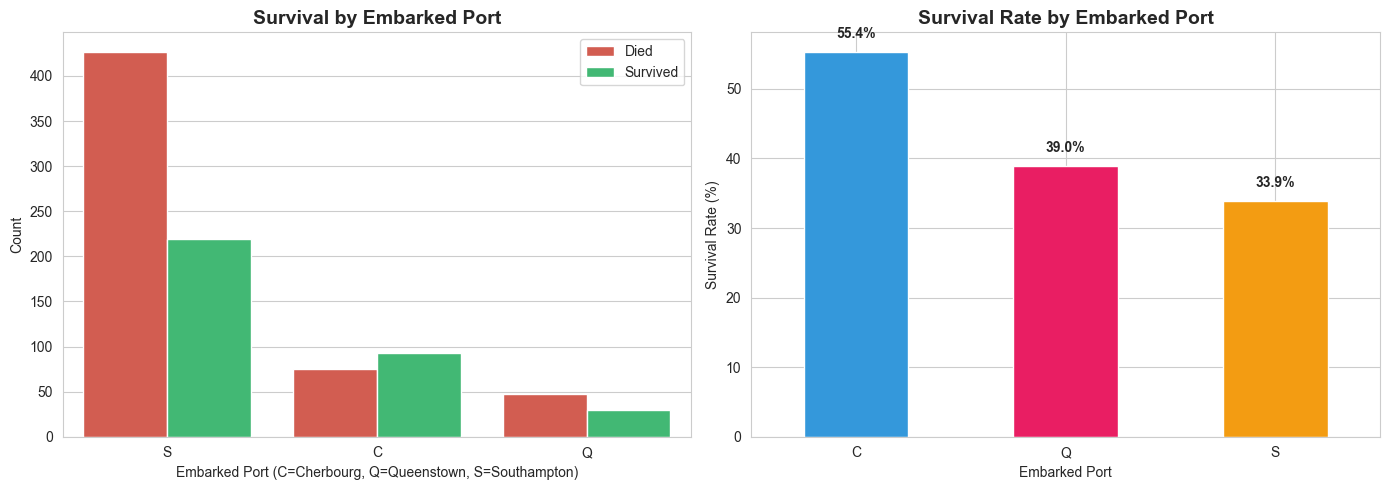

In [17]:
# Survival by Embarked
if 'Embarked' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df_clean, x='Embarked', hue='Survived', ax=axes[0], palette=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival by Embarked Port', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Embarked Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
    axes[0].set_ylabel('Count')
    axes[0].legend(['Died', 'Survived'])
    
    # Survival rate
    survival_by_embarked = df_clean.groupby('Embarked')['Survived'].mean() * 100
    survival_by_embarked.plot(kind='bar', ax=axes[1], color=['#3498db', '#e91e63', '#f39c12'])
    axes[1].set_title('Survival Rate by Embarked Port', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Embarked Port')
    axes[1].set_ylabel('Survival Rate (%)')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    
    for i, v in enumerate(survival_by_embarked):
        axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('charts/08_survival_by_embarked.png', dpi=300, bbox_inches='tight')
    plt.show()

### 7.7 Multi-Variable Analysis

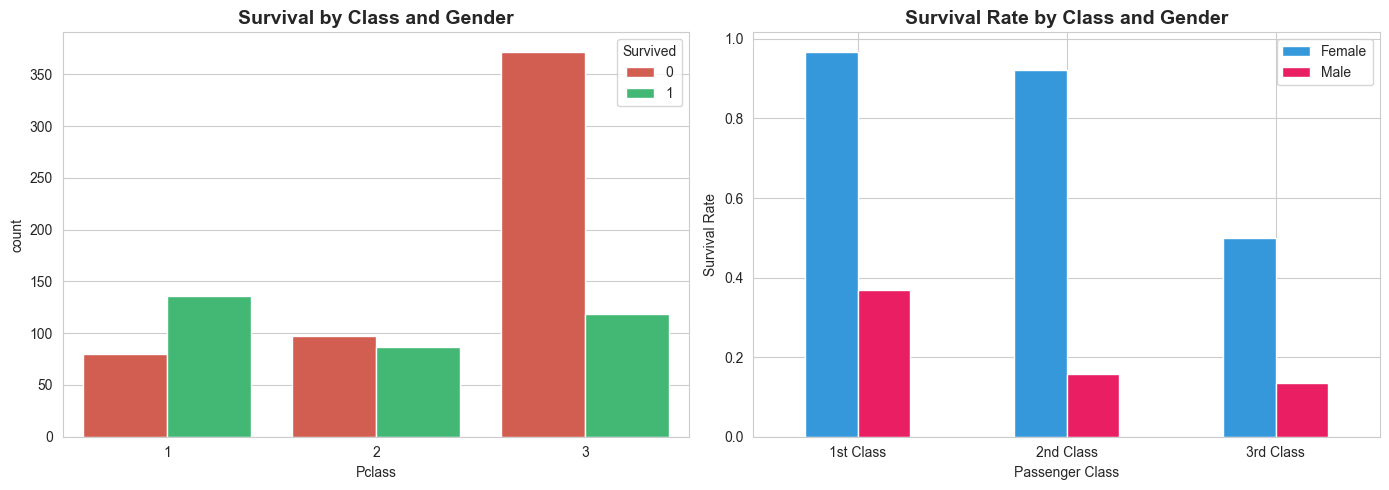

In [18]:
# Survival by Pclass and Sex
if 'Pclass' in df_clean.columns and 'Sex' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df_clean, x='Pclass', hue='Survived', ax=axes[0], palette=['#e74c3c', '#2ecc71'])
    axes[0].set_title('Survival by Class and Gender', fontsize=14, fontweight='bold')
    
    # Facet grid
    survival_pclass_sex = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
    survival_pclass_sex.plot(kind='bar', ax=axes[1], color=['#3498db', '#e91e63'])
    axes[1].set_title('Survival Rate by Class and Gender', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Passenger Class')
    axes[1].set_ylabel('Survival Rate')
    axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
    axes[1].legend(['Female', 'Male'])
    
    plt.tight_layout()
    plt.savefig('charts/09_survival_by_class_gender.png', dpi=300, bbox_inches='tight')
    plt.show()

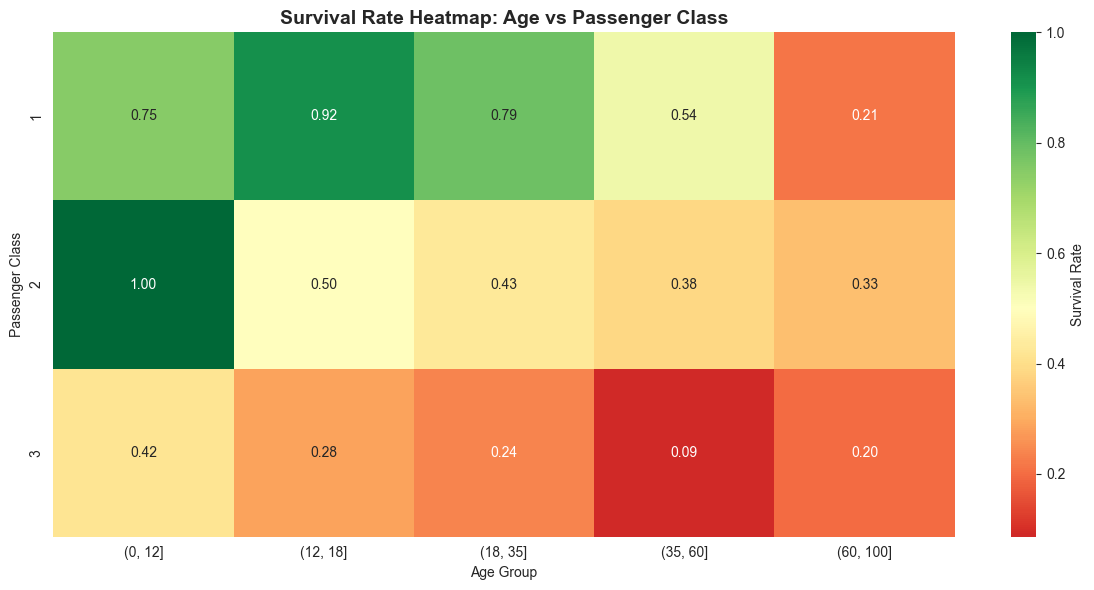

In [19]:
# Heatmap: Survival by Age and Class
if 'Age' in df_clean.columns and 'Pclass' in df_clean.columns and 'Survived' in df_clean.columns:
    # Create age bins
    age_bins = pd.cut(df_clean['Age'], bins=[0, 12, 18, 35, 60, 100])
    
    # Create pivot table
    survival_age_class = pd.crosstab([age_bins, df_clean['Pclass']], df_clean['Survived'])
    survival_age_class['Survival Rate'] = survival_age_class[1] / (survival_age_class[0] + survival_age_class[1])
    
    pivot_data = survival_age_class['Survival Rate'].unstack(level=0)
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', center=0.5,
                cbar_kws={'label': 'Survival Rate'})
    plt.title('Survival Rate Heatmap: Age vs Passenger Class', fontsize=14, fontweight='bold')
    plt.xlabel('Age Group')
    plt.ylabel('Passenger Class')
    plt.tight_layout()
    plt.savefig('charts/10_heatmap_age_class.png', dpi=300, bbox_inches='tight')
    plt.show()

### 7.8 Correlation Analysis

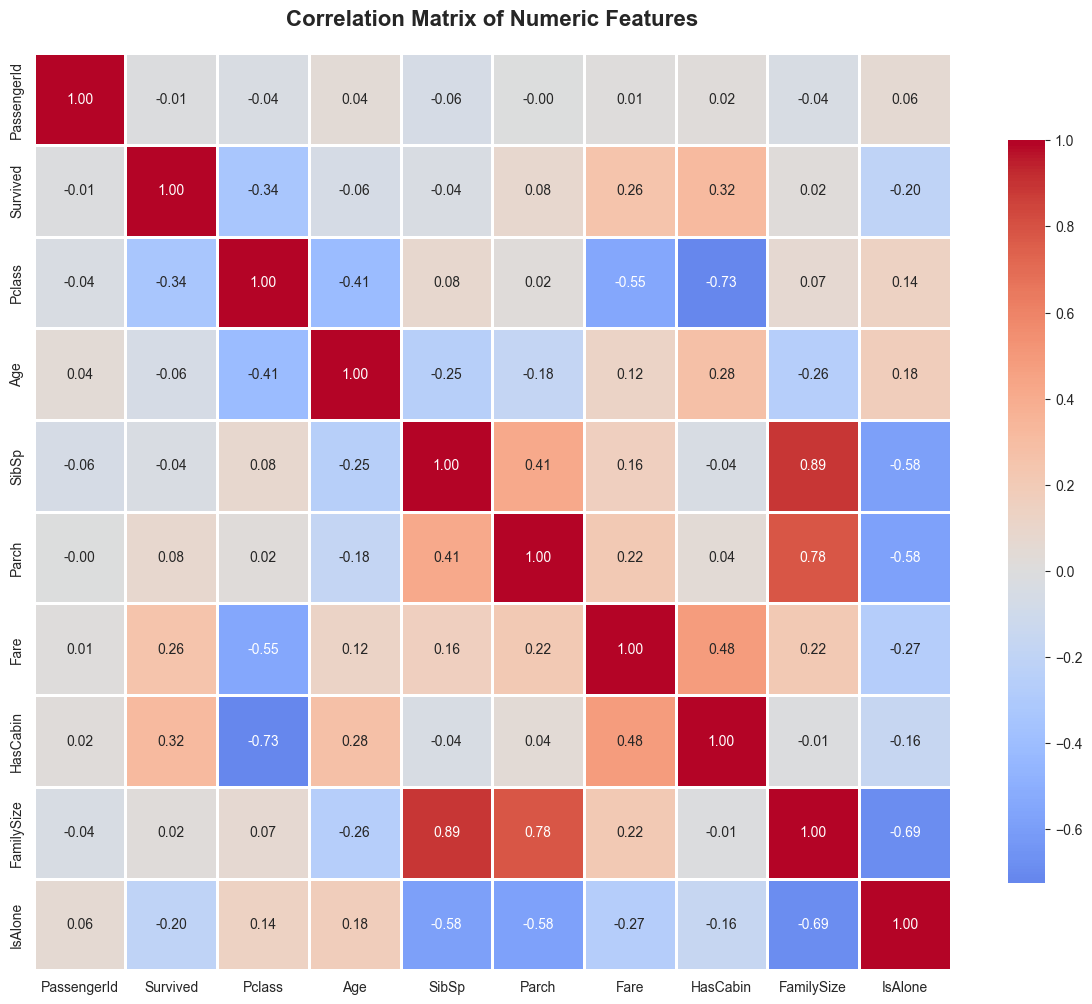


Correlation with Survival:
Survived       1.000000
HasCabin       0.316912
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


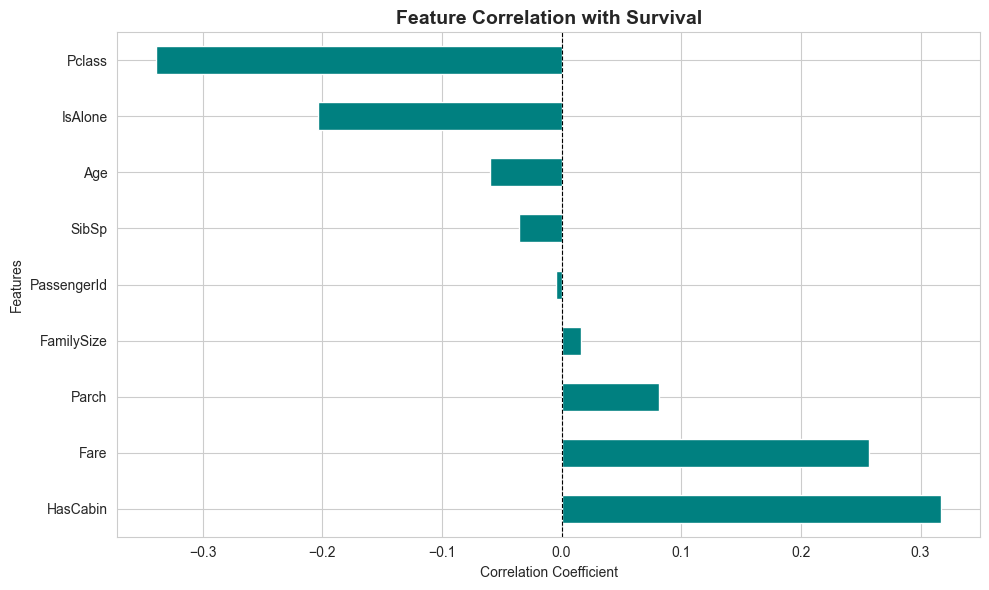

In [20]:
# Select numeric columns for correlation
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Create correlation matrix
correlation_matrix = df_clean[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('charts/11_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature correlation with Survival
if 'Survived' in correlation_matrix.columns:
    survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
    print("\nCorrelation with Survival:")
    print(survival_corr)
    
    # Plot
    plt.figure(figsize=(10, 6))
    survival_corr[1:].plot(kind='barh', color='teal')
    plt.title('Feature Correlation with Survival', fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.savefig('charts/12_survival_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

### 7.9 Fare Analysis

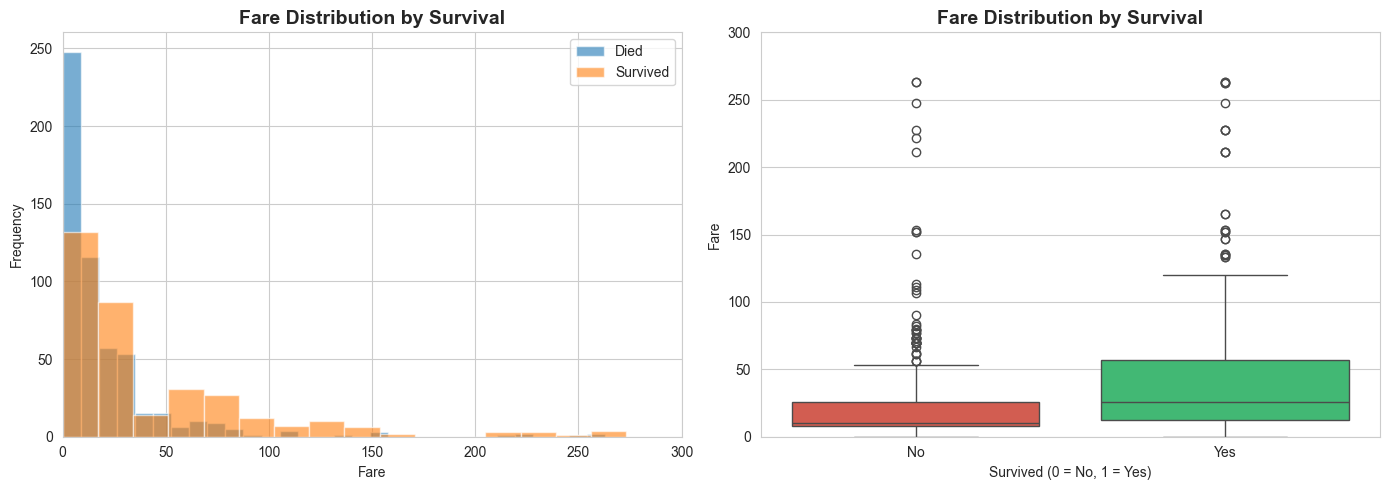

In [21]:
# Fare distribution
if 'Fare' in df_clean.columns and 'Survived' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    for survived in [0, 1]:
        axes[0].hist(df_clean[df_clean['Survived'] == survived]['Fare'],
                    alpha=0.6, bins=30, label=['Died', 'Survived'][survived])
    axes[0].set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Fare')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].set_xlim([0, 300])
    
    # Box plot
    sns.boxplot(data=df_clean, x='Survived', y='Fare', ax=axes[1], palette=['#e74c3c', '#2ecc71'])
    axes[1].set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Survived (0 = No, 1 = Yes)')
    axes[1].set_ylabel('Fare')
    axes[1].set_xticklabels(['No', 'Yes'])
    axes[1].set_ylim([0, 300])
    
    plt.tight_layout()
    plt.savefig('charts/13_survival_by_fare.png', dpi=300, bbox_inches='tight')
    plt.show()

## 8. Data Preparation for Modeling

In [22]:
# Create a copy for modeling
df_model = df_clean.copy()

# Select features for modeling
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 
                'FamilySize', 'IsAlone', 'HasCabin']

# Add Title if available
if 'Title' in df_model.columns:
    feature_cols.append('Title')

# Keep only necessary columns
available_features = [col for col in feature_cols if col in df_model.columns]
if 'Survived' in df_model.columns:
    df_model = df_model[available_features + ['Survived']]
else:
    df_model = df_model[available_features]

print(f"Features selected: {available_features}")
print(f"\nDataset shape: {df_model.shape}")
df_model.head()

Features selected: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'HasCabin', 'Title']

Dataset shape: (891, 12)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,HasCabin,Title,Survived
0,3,male,22.0,1,0,7.2500,S,2,0,0,Mr,0
1,1,female,38.0,1,0,71.2833,C,2,0,1,Mrs,1
2,3,female,26.0,0,0,7.9250,S,1,1,0,Miss,1
3,1,female,35.0,1,0,53.1000,S,2,0,1,Mrs,1
4,3,male,35.0,0,0,8.0500,S,1,1,0,Mr,0


In [23]:
# Encode categorical variables
df_encoded = df_model.copy()

# Label encoding for binary categories
if 'Sex' in df_encoded.columns:
    df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for Embarked
if 'Embarked' in df_encoded.columns:
    embarked_dummies = pd.get_dummies(df_encoded['Embarked'], prefix='Embarked', drop_first=True)
    df_encoded = pd.concat([df_encoded, embarked_dummies], axis=1)
    df_encoded.drop('Embarked', axis=1, inplace=True)

# One-hot encoding for Title
if 'Title' in df_encoded.columns:
    title_dummies = pd.get_dummies(df_encoded['Title'], prefix='Title', drop_first=True)
    df_encoded = pd.concat([df_encoded, title_dummies], axis=1)
    df_encoded.drop('Title', axis=1, inplace=True)

print("Encoded features:")
print(df_encoded.columns.tolist())
print(f"\nShape: {df_encoded.shape}")

Encoded features:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'HasCabin', 'Survived', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

Shape: (891, 16)


In [24]:
# Split features and target
if 'Survived' in df_encoded.columns:
    X = df_encoded.drop('Survived', axis=1)
    y = df_encoded['Survived']
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"\nTarget distribution:")
    print(y.value_counts(normalize=True))
else:
    print("Warning: 'Survived' column not found!")

Features shape: (891, 15)
Target shape: (891,)

Target distribution:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set size: 712
Test set size: 179

Training set class distribution:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Test set class distribution:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [26]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Data scaled successfully!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")

Data scaled successfully!

Scaled training data shape: (712, 15)
Scaled test data shape: (179, 15)


## 9. Model Training and Evaluation

### 9.1 Baseline Models

In [27]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

print(f"Total models to train: {len(models)}")

Total models to train: 10


In [28]:
# Train and evaluate all models
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'ROC AUC': roc_auc
    })
    
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, CV Mean: {cv_mean:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(results_df.to_string(index=False))


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8380, F1-Score: 0.7852, CV Mean: 0.8175

Training Decision Tree...
Decision Tree - Accuracy: 0.7709, F1-Score: 0.7092, CV Mean: 0.7529

Training Random Forest...
Random Forest - Accuracy: 0.7933, F1-Score: 0.7299, CV Mean: 0.7909

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.8101, F1-Score: 0.7344, CV Mean: 0.8231

Training XGBoost...
XGBoost - Accuracy: 0.7877, F1-Score: 0.7324, CV Mean: 0.7936

Training LightGBM...
LightGBM - Accuracy: 0.8045, F1-Score: 0.7482, CV Mean: 0.8119

Training SVM...
SVM - Accuracy: 0.8268, F1-Score: 0.7669, CV Mean: 0.8329

Training KNN...
KNN - Accuracy: 0.7933, F1-Score: 0.7338, CV Mean: 0.8161

Training Naive Bayes...
Naive Bayes - Accuracy: 0.7821, F1-Score: 0.7194, CV Mean: 0.7936

Training AdaBoost...
AdaBoost - Accuracy: 0.8045, F1-Score: 0.7552, CV Mean: 0.8161

MODEL COMPARISON RESULTS
              Model  Accuracy  Precision   Recall  F1-Score  CV Mean  ROC AUC
Lo

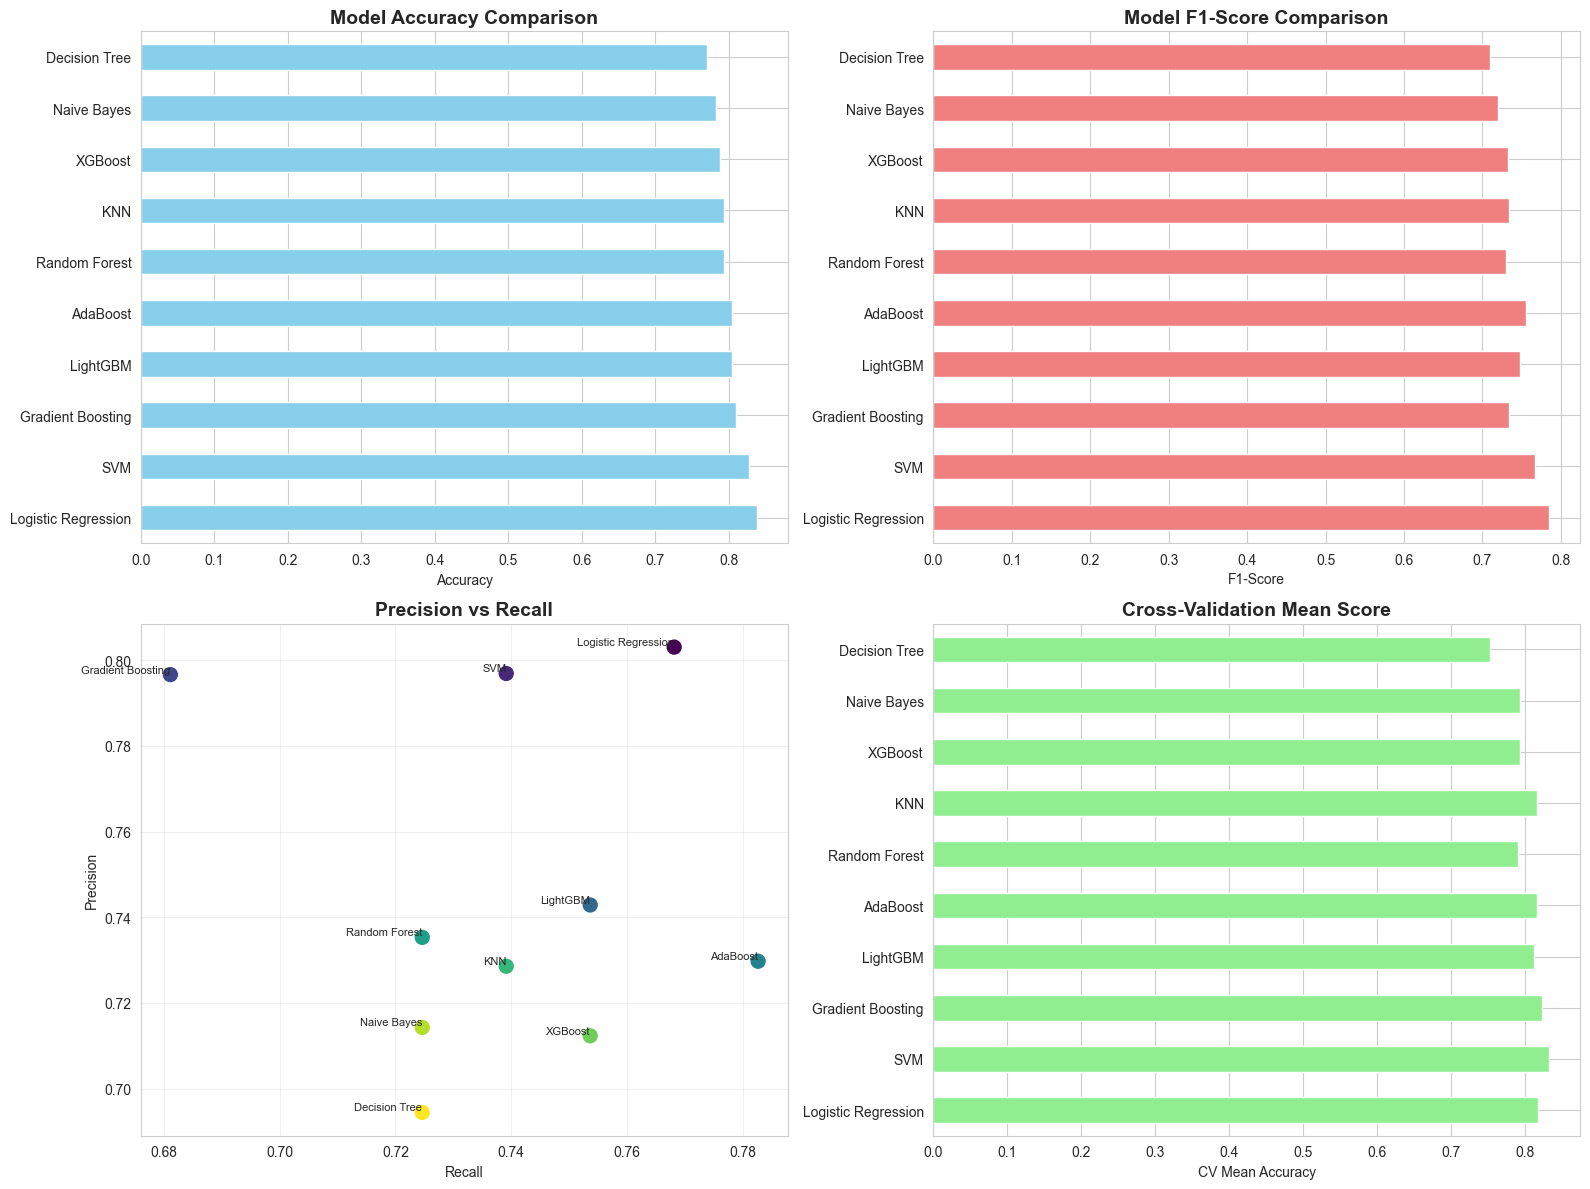

In [29]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
results_df.plot(x='Model', y='Accuracy', kind='barh', ax=axes[0, 0], color='skyblue', legend=False)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_ylabel('')

# F1-Score
results_df.plot(x='Model', y='F1-Score', kind='barh', ax=axes[0, 1], color='lightcoral', legend=False)
axes[0, 1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_ylabel('')

# Precision vs Recall
axes[1, 0].scatter(results_df['Recall'], results_df['Precision'], s=100, c=range(len(results_df)), cmap='viridis')
for idx, row in results_df.iterrows():
    axes[1, 0].annotate(row['Model'], (row['Recall'], row['Precision']), 
                       fontsize=8, ha='right', va='bottom')
axes[1, 0].set_title('Precision vs Recall', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].grid(True, alpha=0.3)

# CV Mean
results_df.plot(x='Model', y='CV Mean', kind='barh', ax=axes[1, 1], color='lightgreen', legend=False)
axes[1, 1].set_title('Cross-Validation Mean Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('CV Mean Accuracy')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.savefig('charts/14_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### 9.2 Best Model Selection

In [30]:
# Select best model based on accuracy
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"\nBest Model Metrics:")
print(results_df.iloc[0].to_string())

Best Model: Logistic Regression

Best Model Metrics:
Model        Logistic Regression
Accuracy                0.837989
Precision                0.80303
Recall                  0.768116
F1-Score                0.785185
CV Mean                 0.817463
ROC AUC                 0.871542


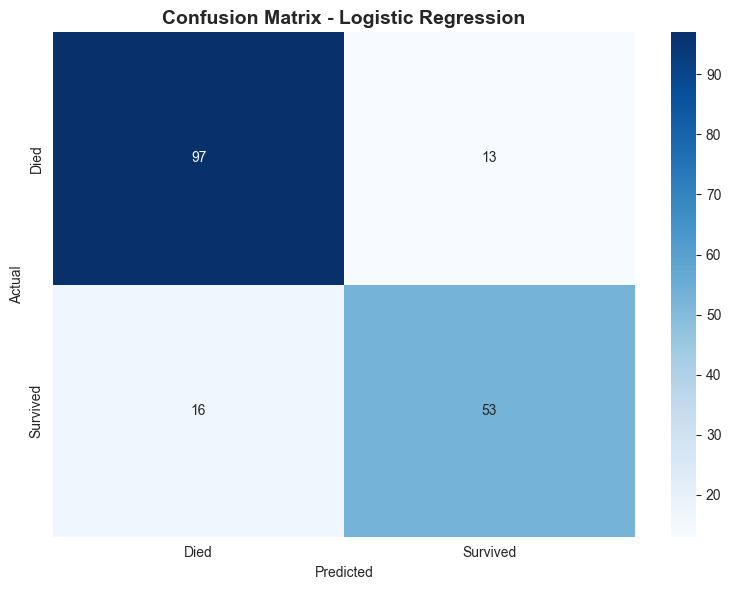


Classification Report:
              precision    recall  f1-score   support

        Died       0.86      0.88      0.87       110
    Survived       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [31]:
# Confusion Matrix for best model
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('charts/15_confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Died', 'Survived']))

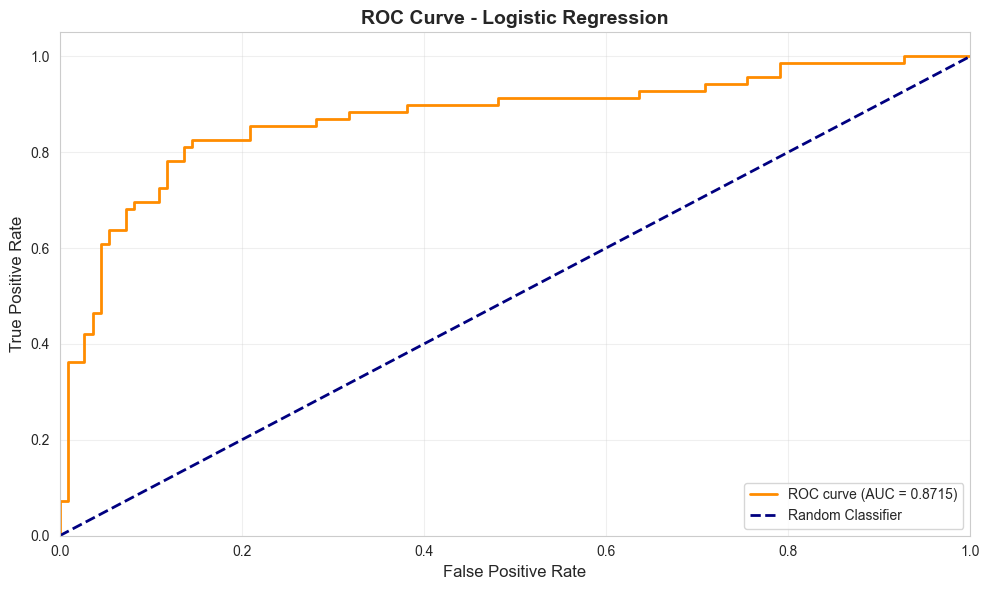

In [32]:
# ROC Curve for best model
if hasattr(best_model, 'predict_proba'):
    y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
    roc_auc = roc_auc_score(y_test, y_pred_proba_best)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('charts/16_roc_curve_best.png', dpi=300, bbox_inches='tight')
    plt.show()

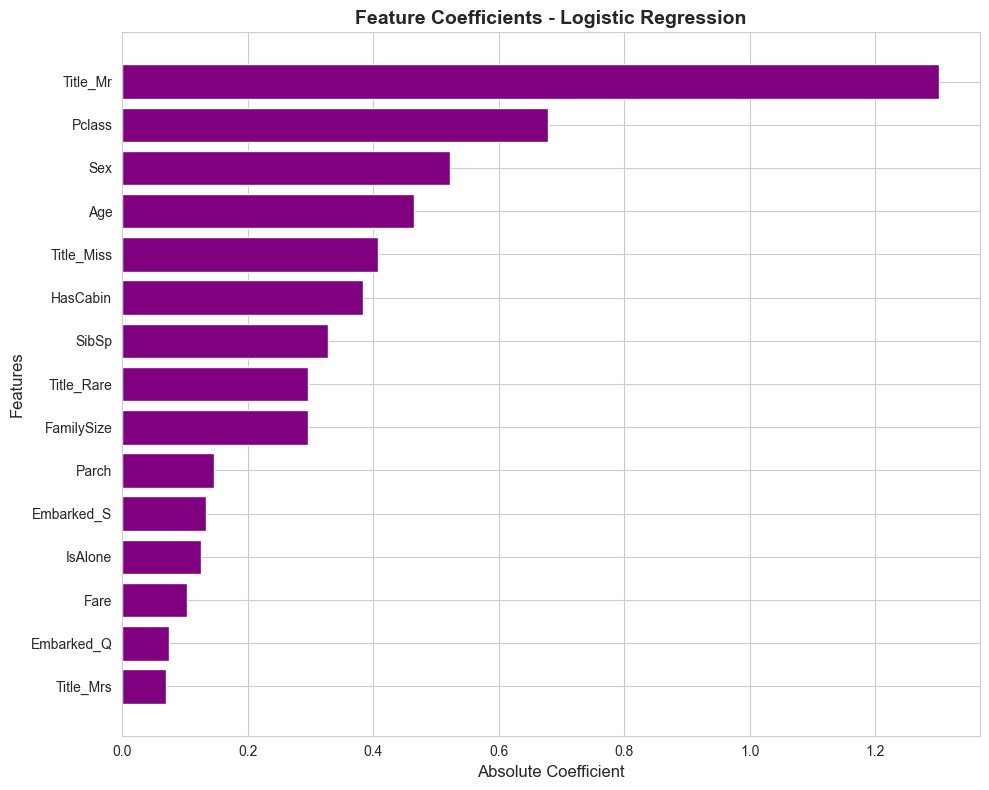


Top 10 Important Features:
   Feature  Coefficient
  Title_Mr     1.301782
    Pclass     0.678180
       Sex     0.522254
       Age     0.465806
Title_Miss     0.407439
  HasCabin     0.383517
     SibSp     0.327427
Title_Rare     0.295625
FamilySize     0.295499
     Parch     0.145863


In [33]:
# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='teal')
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('charts/17_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10).to_string(index=False))
elif hasattr(best_model, 'coef_'):
    # For linear models
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': abs(best_model.coef_[0])
    }).sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], color='purple')
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Absolute Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'Feature Coefficients - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('charts/17_feature_coefficients.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10).to_string(index=False))

## 10. Hyperparameter Optimization

### 10.1 Grid Search for Top 3 Models

In [34]:
# Get top 3 models
top_3_models = results_df.head(3)['Model'].tolist()
print(f"Top 3 models for hyperparameter tuning: {top_3_models}")

Top 3 models for hyperparameter tuning: ['Logistic Regression', 'SVM', 'Gradient Boosting']


In [35]:
# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'num_leaves': [31, 50, 70],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf', 'linear', 'poly']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0]
    }
}

print("Parameter grids defined for hyperparameter tuning")

Parameter grids defined for hyperparameter tuning


In [36]:
# Perform RandomizedSearchCV for top 3 models
optimized_results = []

for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\n{'='*80}")
        print(f"Optimizing {model_name}...")
        print(f"{'='*80}")
        
        # Get base model
        base_model = models[model_name]
        
        # Perform RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_grids[model_name],
            n_iter=20,  # Number of parameter settings sampled
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        
        # Fit the model
        random_search.fit(X_train_scaled, y_train)
        
        # Best parameters and score
        print(f"\nBest Parameters: {random_search.best_params_}")
        print(f"Best CV Score: {random_search.best_score_:.4f}")
        
        # Evaluate on test set
        y_pred_opt = random_search.best_estimator_.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_pred_opt)
        test_f1 = f1_score(y_test, y_pred_opt)
        
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test F1-Score: {test_f1:.4f}")
        
        # Store results
        optimized_results.append({
            'Model': model_name,
            'Best Params': random_search.best_params_,
            'CV Score': random_search.best_score_,
            'Test Accuracy': test_accuracy,
            'Test F1-Score': test_f1,
            'Best Estimator': random_search.best_estimator_
        })
    else:
        print(f"\nNo parameter grid defined for {model_name}")

print("\n" + "="*80)
print("HYPERPARAMETER OPTIMIZATION COMPLETED")
print("="*80)


Optimizing Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
Best CV Score: 0.8231
Test Accuracy: 0.8045
Test F1-Score: 0.7328

Optimizing SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best CV Score: 0.8329
Test Accuracy: 0.8268
Test F1-Score: 0.7669

Optimizing Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best CV Score: 0.8259
Test Accuracy: 0.8156
Test F1-Score: 0.7442

HYPERPARAMETER OPTIMIZATION COMPLETED


In [37]:
# Compare optimized vs baseline models
comparison_data = []

for opt_result in optimized_results:
    model_name = opt_result['Model']
    baseline_acc = results_df[results_df['Model'] == model_name]['Accuracy'].values[0]
    optimized_acc = opt_result['Test Accuracy']
    improvement = ((optimized_acc - baseline_acc) / baseline_acc) * 100
    
    comparison_data.append({
        'Model': model_name,
        'Baseline Accuracy': baseline_acc,
        'Optimized Accuracy': optimized_acc,
        'Improvement (%)': improvement
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nBaseline vs Optimized Model Comparison:")
print(comparison_df.to_string(index=False))


Baseline vs Optimized Model Comparison:
              Model  Baseline Accuracy  Optimized Accuracy  Improvement (%)
Logistic Regression           0.837989            0.804469        -4.000000
                SVM           0.826816            0.826816         0.000000
  Gradient Boosting           0.810056            0.815642         0.689655


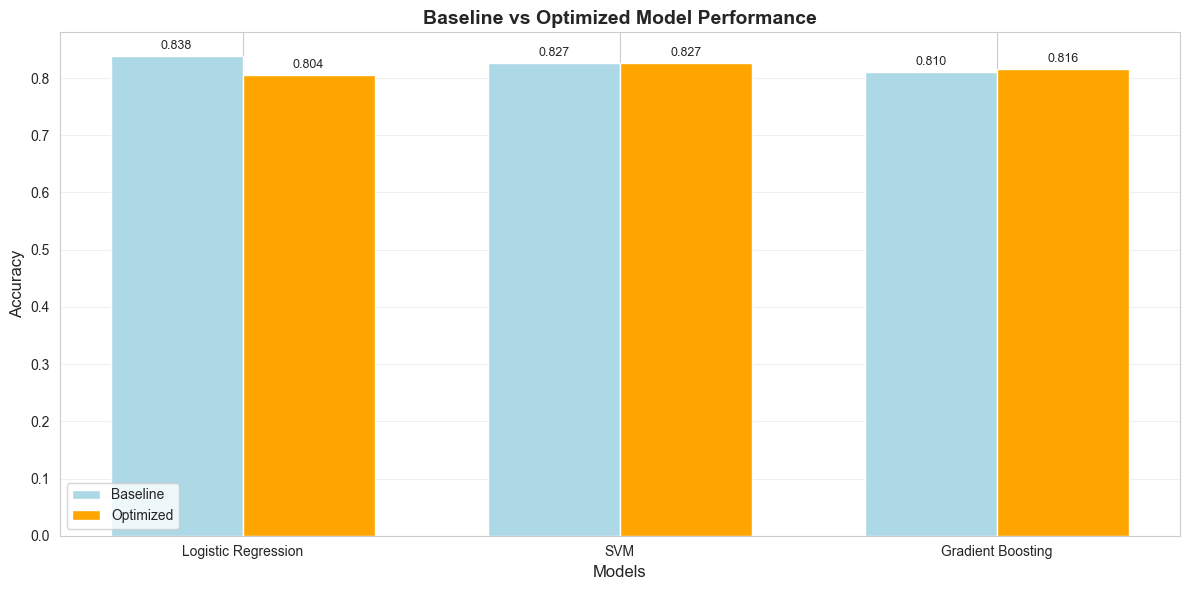

In [38]:
# Visualize improvement
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Baseline Accuracy'], width, label='Baseline', color='lightblue')
bars2 = ax.bar(x + width/2, comparison_df['Optimized Accuracy'], width, label='Optimized', color='orange')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Baseline vs Optimized Model Performance', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('charts/18_baseline_vs_optimized.png', dpi=300, bbox_inches='tight')
plt.show()

### 10.2 Final Best Model Selection

In [39]:
# Select the best optimized model
best_optimized = max(optimized_results, key=lambda x: x['Test Accuracy'])

print("\n" + "="*80)
print("FINAL BEST MODEL")
print("="*80)
print(f"Model: {best_optimized['Model']}")
print(f"Test Accuracy: {best_optimized['Test Accuracy']:.4f}")
print(f"Test F1-Score: {best_optimized['Test F1-Score']:.4f}")
print(f"CV Score: {best_optimized['CV Score']:.4f}")
print(f"\nBest Parameters:")
for param, value in best_optimized['Best Params'].items():
    print(f"  {param}: {value}")

# Save the best model
final_model = best_optimized['Best Estimator']
final_model_name = best_optimized['Model']


FINAL BEST MODEL
Model: SVM
Test Accuracy: 0.8268
Test F1-Score: 0.7669
CV Score: 0.8329

Best Parameters:
  kernel: rbf
  gamma: scale
  C: 1


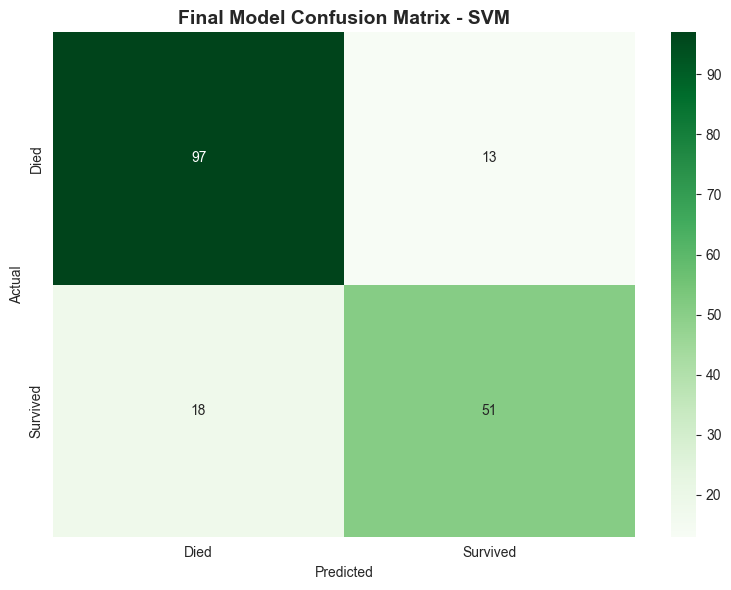


Final Classification Report:
              precision    recall  f1-score   support

        Died       0.84      0.88      0.86       110
    Survived       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [40]:
# Final confusion matrix
y_pred_final = final_model.predict(X_test_scaled)
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title(f'Final Model Confusion Matrix - {final_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('charts/19_final_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final, target_names=['Died', 'Survived']))

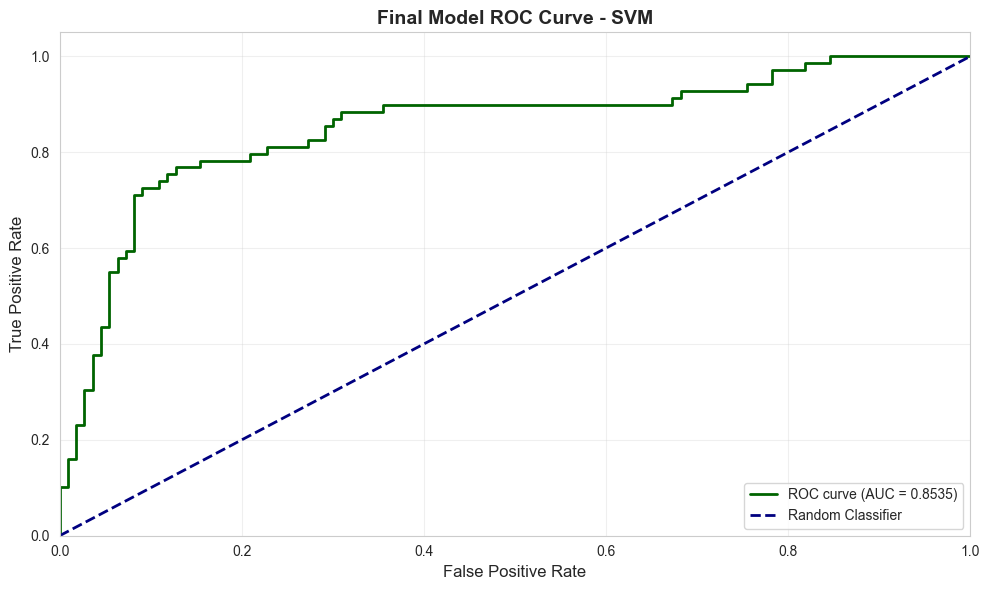

In [41]:
# Final ROC curve
if hasattr(final_model, 'predict_proba'):
    y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]
    fpr_final, tpr_final, _ = roc_curve(y_test, y_pred_proba_final)
    roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_final, tpr_final, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_final:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'Final Model ROC Curve - {final_model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('charts/20_final_roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

## 11. Summary and Insights

In [42]:
print("\n" + "="*80)
print("TITANIC DISASTER ANALYSIS - SUMMARY")
print("="*80)

print("\n1. DATA OVERVIEW:")
print(f"   - Total passengers: {len(df)}")
print(f"   - Survivors: {df['Survived'].sum()} ({df['Survived'].mean()*100:.2f}%)")
print(f"   - Deaths: {len(df) - df['Survived'].sum()} ({(1-df['Survived'].mean())*100:.2f}%)")

print("\n2. KEY INSIGHTS FROM EDA:")
print(f"   - Female survival rate: {df_clean[df_clean['Sex']=='female']['Survived'].mean()*100:.2f}%")
print(f"   - Male survival rate: {df_clean[df_clean['Sex']=='male']['Survived'].mean()*100:.2f}%")
print(f"   - 1st class survival rate: {df_clean[df_clean['Pclass']==1]['Survived'].mean()*100:.2f}%")
print(f"   - 3rd class survival rate: {df_clean[df_clean['Pclass']==3]['Survived'].mean()*100:.2f}%")

print("\n3. MODEL PERFORMANCE:")
print(f"   - Total models tested: {len(models)}")
print(f"   - Best baseline model: {best_model_name}")
print(f"   - Final optimized model: {final_model_name}")
print(f"   - Final test accuracy: {best_optimized['Test Accuracy']:.4f}")
print(f"   - Final test F1-Score: {best_optimized['Test F1-Score']:.4f}")

print("\n4. RECOMMENDATIONS:")
print("   - Gender and passenger class were the strongest predictors of survival")
print("   - Family size had a non-linear relationship with survival")
print("   - Age and fare also contributed to survival prediction")
print("   - The 'women and children first' policy was evident in the data")

print("\n5. FILES GENERATED:")
print(f"   - Total charts saved: {len([f for f in os.listdir('charts') if f.endswith('.png')])}")
print(f"   - Charts directory: charts/")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)


TITANIC DISASTER ANALYSIS - SUMMARY

1. DATA OVERVIEW:
   - Total passengers: 891
   - Survivors: 342 (38.38%)
   - Deaths: 549 (61.62%)

2. KEY INSIGHTS FROM EDA:
   - Female survival rate: 74.20%
   - Male survival rate: 18.89%
   - 1st class survival rate: 62.96%
   - 3rd class survival rate: 24.24%

3. MODEL PERFORMANCE:
   - Total models tested: 10
   - Best baseline model: Logistic Regression
   - Final optimized model: SVM
   - Final test accuracy: 0.8268
   - Final test F1-Score: 0.7669

4. RECOMMENDATIONS:
   - Gender and passenger class were the strongest predictors of survival
   - Family size had a non-linear relationship with survival
   - Age and fare also contributed to survival prediction
   - The 'women and children first' policy was evident in the data

5. FILES GENERATED:
   - Total charts saved: 20
   - Charts directory: charts/

ANALYSIS COMPLETE!
